In [1]:
import glob
import os
import importlib
import sys
from grandprix import Sim
import numpy as np

path="/home/jgoppert/Downloads/grandprix/"
sys.path.insert(0, path)
os.chdir(path)

results = []
data = {}
for f in glob.glob("*.py"):
    mod_name = f.split('.')[0]
    np.random.seed(1234) # I will set a new seed for each race
    mod = importlib.import_module(mod_name)
    sim = Sim(mod.Controller)
    dist = sim.run()
    name = f.split('_')[1]
    results.append({
        'name': name,
        'dist': dist})
    data[name] = sim.data

results = sorted(results, key=lambda x: x['dist'], reverse=True)

place = 1
j = 0
while j < len(results):
    tie_count = 1
    i = 0
    while j + i + 1 < len(results):
        if results[j + i]['dist'] == results[j + i  + 1]['dist']:
            tie_count += 1
            i += 1
        else:
            break
    if tie_count > 1:
        for i in range(tie_count):
            results[j + i]['place'] = int(place + tie_count/2)
        j += tie_count
        place += tie_count
    else:
        results[j]['place'] = place
        place += 1
        j += 1
    
print('Grand Prix Race Results')
for r in results:
    #print("place: {:4d}\t\tname: {:15s}\ttime: {:10.3f} m".format(r['place'], r['name'], r['dist']))
    print("place: {:4d}\ttime: {:10.3f} m".format(r['place'], r['dist']))

Grand Prix Race Results
place:    1	time:      3.711 m
place:    5	time:      2.363 m
place:    5	time:      2.363 m
place:    5	time:      2.363 m
place:    5	time:      2.363 m
place:    5	time:      2.363 m
place:    5	time:      2.363 m
place:    8	time:      2.154 m


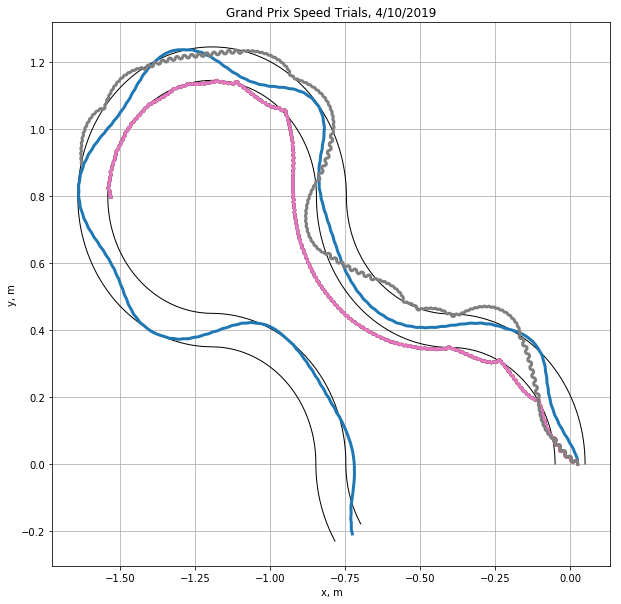

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
d = data[results[0]['name']]
plt.plot(d['track_left_x'], d['track_left_y'], 'k', linewidth=1)
plt.plot(d['track_right_x'], d['track_right_y'], 'k', linewidth=1)
plt.grid()
for i in range(len(results)):
    d = data[results[i]['name']]
    plt.plot(d['x'], d['y'], linewidth=3)
plt.title('Grand Prix Speed Trials, 4/10/2019')
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.savefig('/home/jgoppert/Desktop/speedtrials.png')